### Pair II
# Preprocesado

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------
pd.options.display.max_columns = None

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Set2", 20)

Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:
- Estandarizar las variables numéricas de vuestro set de datos
- Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.
- Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.
- Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

**No vamos a estandarizar los datos porque vamos a crear un modelo de predicción con los datos sin estandarizar para comparlo con el resto de modelos**

In [2]:
df = pd.read_pickle("../data/Invistico_Airline_limpio_outliers_gestionados.pkl")
df.sample(2)

,satisfaccion,genero,cliente,edad,viaje,clase,distancia,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,retraso_salida
91053,satisfecho,mujer,cliente leal,45,viaje de negocios,Eco,408,4,4,4,4,3,3,2,4,4,4,4,2,4,1,1
120193,satisfecho,mujer,cliente leal,57,viaje de negocios,Business,73,1,1,4,1,2,1,2,5,5,5,5,4,5,2,0


```Codificación con datos sin estandarizar```

Comprobamos con un countplot que sí tienen orden.

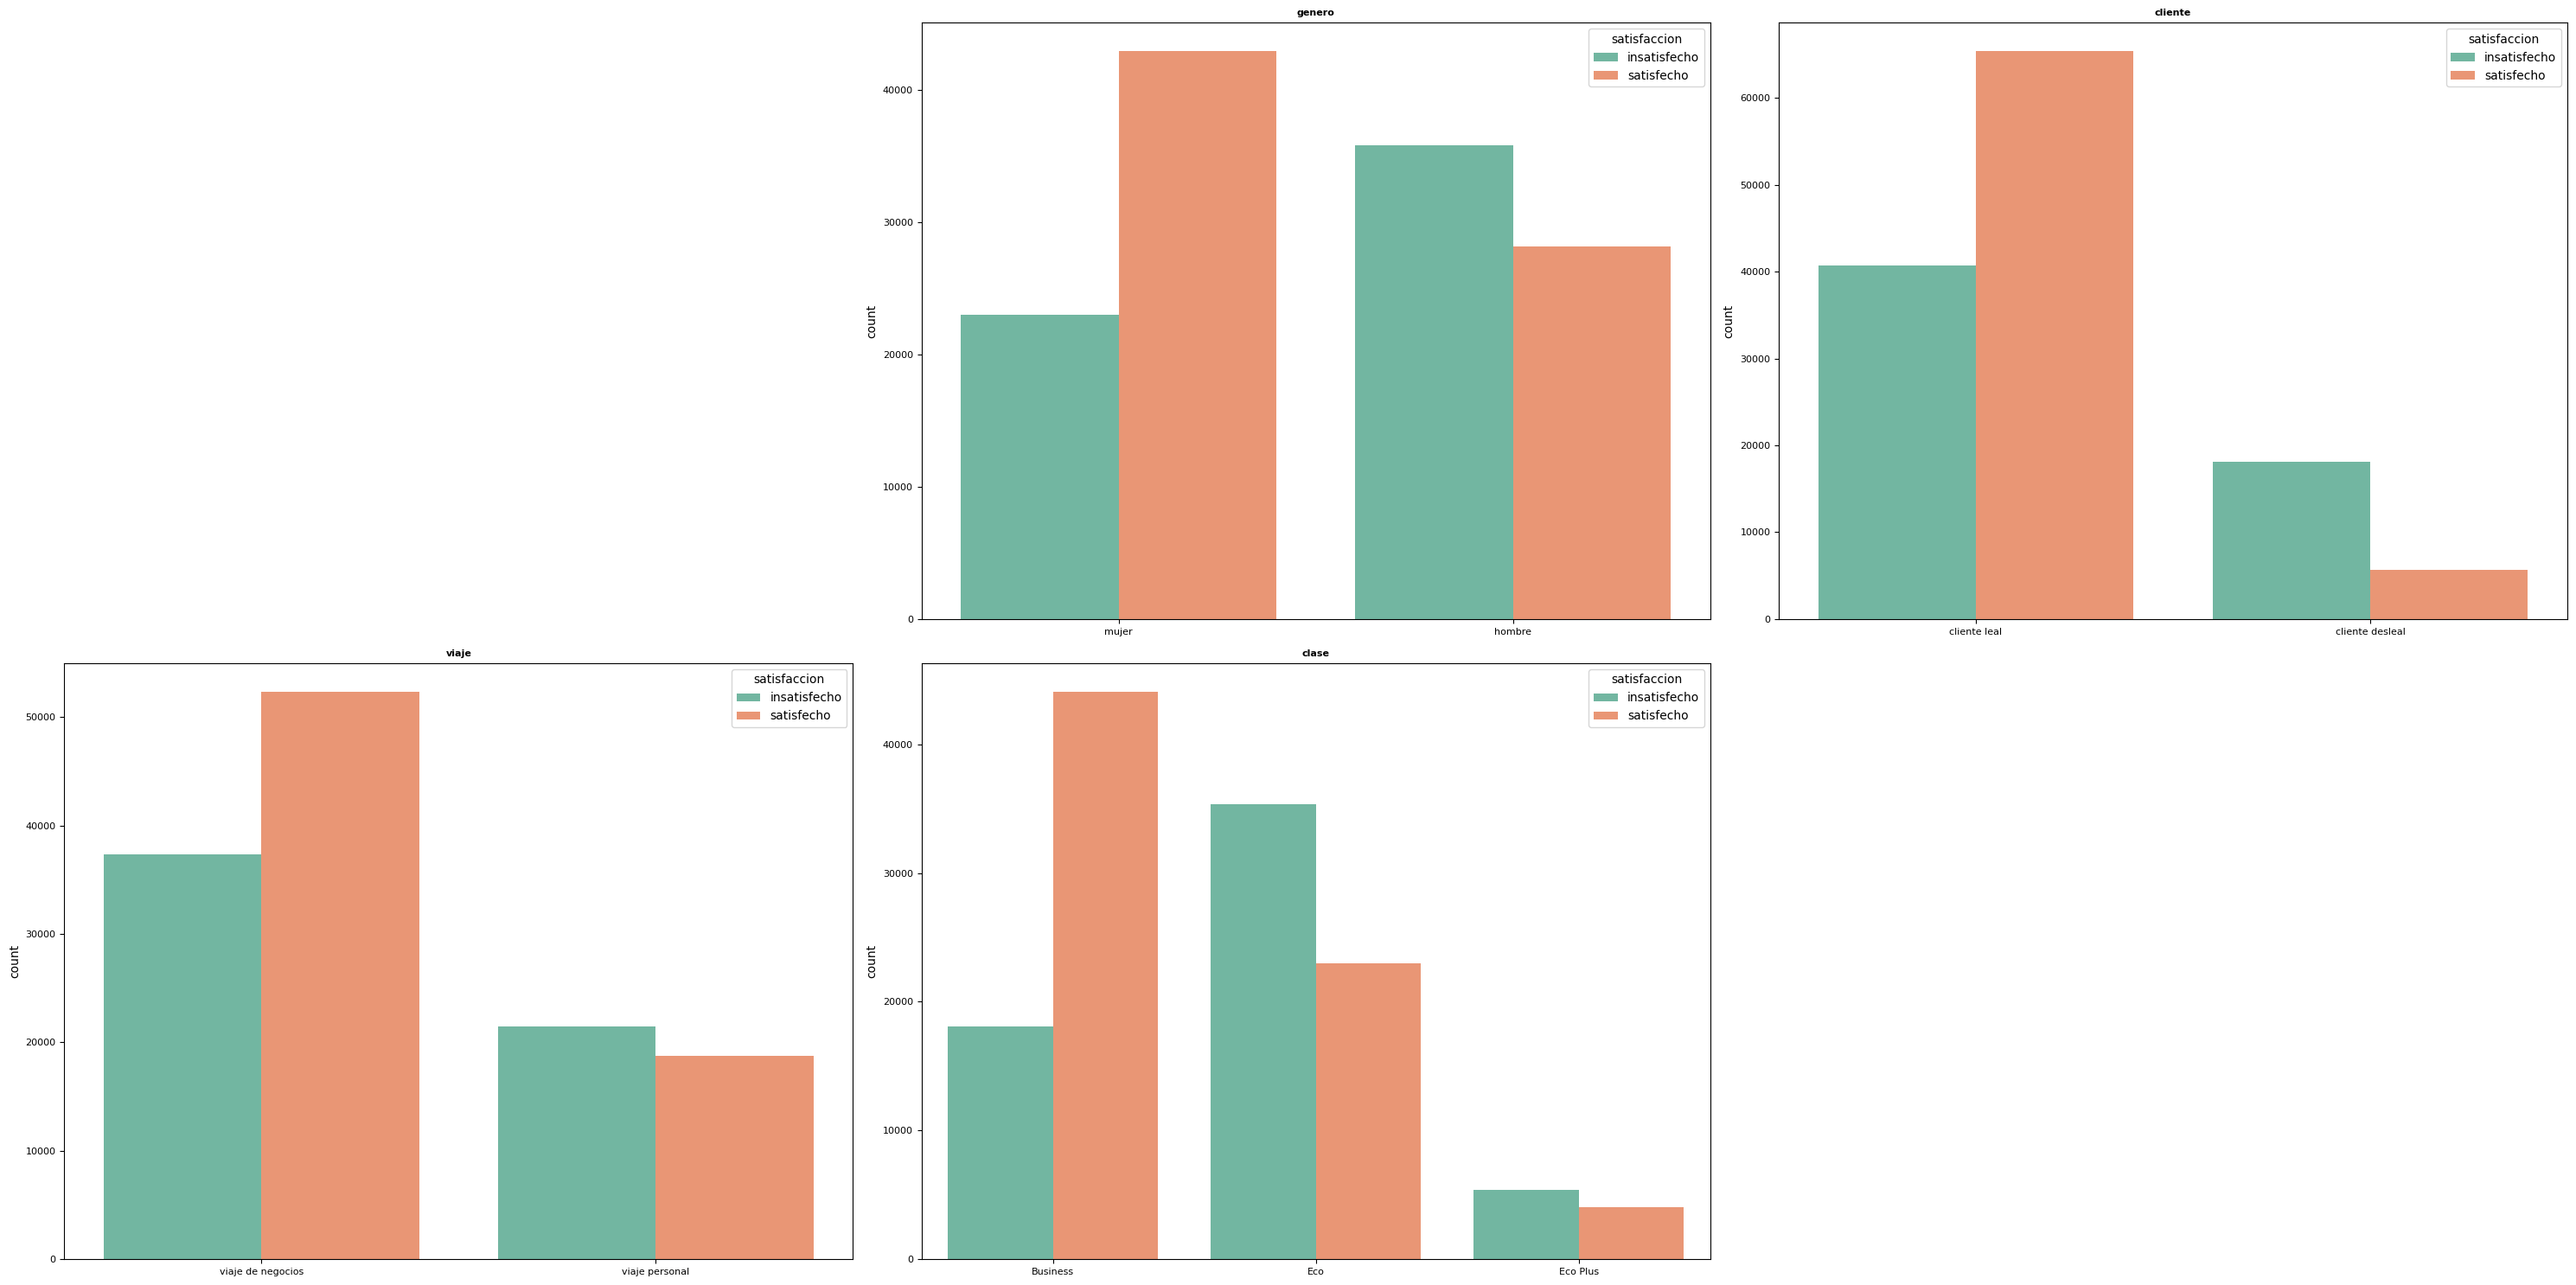

In [3]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 15))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "category").columns


for i, colum in enumerate(columnas_cat, start = 1): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "satisfaccion",
        ax=axes[i - 1],
        palette= qualitative_colors)
    
    
    axes[i -1].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i -1].tick_params(labelsize = 8)
    axes[i- 1].set_xlabel("")
   

fig.tight_layout()
fig.delaxes(axes[0])
fig.delaxes(axes[-1])
plt.savefig("../graficas/02_orden_cat_sin_estan_sin_outliers.png");

``Encoding de categóricas con orden ``

In [4]:
map_satisfaccion = {"satisfecho": 1, "insatisfecho": 0}
map_genero = {"hombre": 0, "mujer":1}
map_cliente = {"cliente leal": 0, "cliente desleal": 1}
map_viaje = {"viaje personal": 0, "viaje de negocios": 1}
map_clase = {"Eco": 0, "Business": 1, "Eco Plus": 2}


df["satisfaccion"] = df["satisfaccion"].map(map_satisfaccion)
df["genero"] = df["genero"].map(map_genero)
df["cliente"] = df["cliente"].map(map_cliente)
df["viaje"] = df["viaje"].map(map_viaje)
df["clase"] = df["clase"].map(map_clase)

```Desbalanceo usando imblearn (SMOTE)```

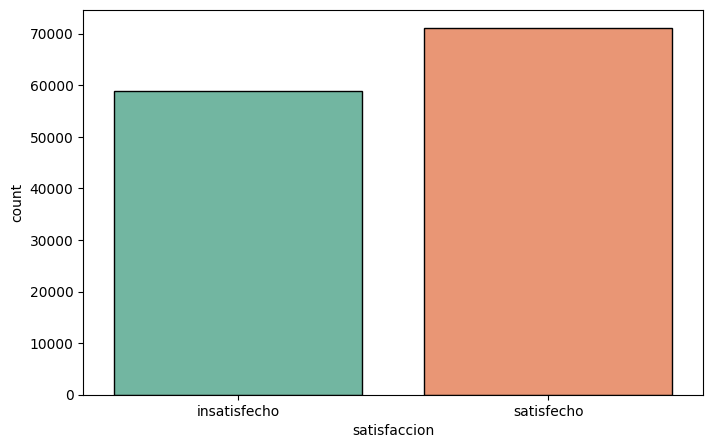

In [5]:
plt.figure(figsize=(8,5)) 

fig1 = sns.countplot(data = df, x = "satisfaccion",  palette= qualitative_colors,  edgecolor='black')
fig1.set(xticklabels=["insatisfecho", "satisfecho"]) 
plt.show();

In [6]:
# lo primero que hacemos es sacar el número de registros que tenemos para la clase minoritaria
num_minoritarios = df["satisfaccion"].value_counts()[1]
num_minoritarios

71087

In [7]:
# para aplicar este método lo primero que tenemos que hacer es separar en X e y y en train y test como aprendimos en la lecciones de regresion lineal
y = df['satisfaccion']
X = df.drop('satisfaccion', axis=1)


#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [8]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [9]:
y_train.value_counts()

satisfaccion
1    49844
0    41072
Name: count, dtype: int64

In [10]:
y_train_res.value_counts()

satisfaccion
0    46181
1    46181
Name: count, dtype: int64

In [11]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Satisfacción antes del ajuste \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

Satisfacción antes del ajuste 
 satisfaccion
1    49844
0    41072
Name: count, dtype: int64
..............................................................
Distribución después del ajuste 
 satisfaccion
0    46181
1    46181
Name: count, dtype: int64


In [12]:
df.to_pickle("../data/preprocesado_sin_estand_outliers_gestionados.pkl")